# Plot Population Densities of the Counties and the Districts
Read the file ["Readme.ipynb"](Readme.ipynb) for more information.

## Prepare Modules and Data

In [1]:
# Used to cast the polygons into np.arrays to transpose them easily with the .T function
import numpy as np
import matplotlib.pyplot as plt    # to plot the counties
# Used to determine which part of the plot should be saved
from matplotlib.transforms import Bbox
# to take the natural logarithm to scale the exponential growth 
import math
# Used to navigate the directories and check for files
import os
# backup directory of this file, because the working directory is changed to save files
pop_densities_directory = os.getcwd()

In [2]:
os.chdir("..")   # move one directory up
%run color_scheme.ipynb
os.chdir("collect_data")   # move to the cllect_data directory
%run get_data.ipynb
os.chdir(pop_densities_directory)    # return to original directory

Polished county data from file is ready to go!
Polished covid19 data from file is ready to go!


### Plot the Population Density
Generates a plot of the population densities of the counties and the districts. The plots contain a plot showing the distribution and a map of Germany showing the spacial distribution. The two images are saved in the result folder two directories above this file.
#### Population density in the counties
At the end the population densities are plotted on the left side two dimensional as a sorted list to see how many districts have which population density and on the right side as a map of Germany to show their spacial distribution.

C:\Users\leand\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


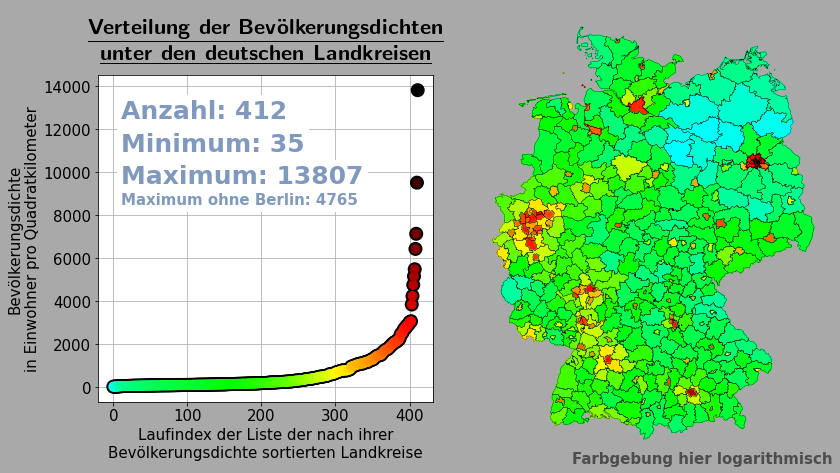

In [3]:
plt.figure(figsize=(6, 6), facecolor='darkgrey')    # enlarge plot
population_densities = list()
for AdmUnitId, county in counties_geography.items():
    population_densities.append(county["population_density"])
population_densities.sort()

plt.title(r"\textbf{\underline{Verteilung der Bevölkerungsdichten}}"+"\n"
          r"\textbf{\underline{unter den deutschen Landkreisen}}",
         fontsize=22, y=1.03, usetex=True)
plt.ylabel("Bevölkerungsdichte\nin Einwohner pro Quadratkilometer",
         fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Laufindex der Liste der nach ihrer\n"+
           "Bevölkerungsdichte sortierten Landkreise", fontsize=15)
plt.xticks(fontsize=15)
plt.grid()
plt.text(10, 12500, "Anzahl: " + str(len(population_densities)),
         fontweight=1000, fontsize=25, color=(0.5, 0.6, 0.75),
         backgroundcolor='w')
plt.text(10, 11000, "Minimum: " + str(int(population_densities[0])),
         fontweight=1000, fontsize=25, color=(0.5, 0.6, 0.75),
         backgroundcolor='w')
plt.text(10, 9500, "Maximum: " + str(int(population_densities[-1])),
         fontweight=1000, fontsize=25, color=(0.5, 0.6, 0.75),
         backgroundcolor='w')
plt.text(10, 8500, "Maximum ohne Berlin: " + str(int(population_densities[-7])),
         fontweight=1000, fontsize=15, color=(0.5, 0.6, 0.75),
         backgroundcolor='w')
plt.text(620, -3500, "Farbgebung hier logarithmisch",
         fontweight=1000, fontsize=15, color=(0.3,0.3,0.3))

colors = list()
for pop_density in population_densities:
    colors.append(color_scheme(math.log(pop_density),
                               [math.log(e) for e in population_densities]))
# plot everything twice: once with black edges - once without
x=[i for i in range(len(population_densities))]
y=population_densities
edges=(["black" for i in range(len(population_densities))]+
       [(0,0,0,0) for i in range(len(population_densities))])
plt.scatter(x+x,y+y, color=colors+colors, zorder=2, s=100,
            linewidth=4, edgecolors=edges)

ax = plt.axes([1, -0.01, 0.82, 1.05], frameon=False) # [left, bottom, width, height
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
for county in counties_geography.values():
    for polygon in county['raw_geometry']:
        x,y = np.array(polygon).T
        plt.plot(x, y, color="black", linewidth=0.3)
    for polygon in county['geometry']:
        x,y = np.array(polygon).T
        plt.fill(x, y, color=color_scheme(
            math.log(county["population_density"]),
            [math.log(e) for e in population_densities]))

os.chdir(".."), os.chdir("..")    # move to correct directory
# check if the needed directory is available - otherwise create it
if not(os.path.isdir("results")): os.makedirs("results")
if not(os.path.isdir("results/Ergebnisse")): os.makedirs("results/Ergebnisse")
plt.savefig("results/Ergebnisse/population_density_counties.png",
            facecolor="darkgrey", bbox_inches=Bbox([[-0.95,-0.2],[11,6.3]]))
os.chdir(pop_densities_directory)    # return to original directory

#### Population density in the districts
At the end the population densities are plotted on the left side two dimensional as a sorted list to see how many districts have which population density and on the right side as a map of Germany to show their spacial distribution.

C:\Users\leand\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


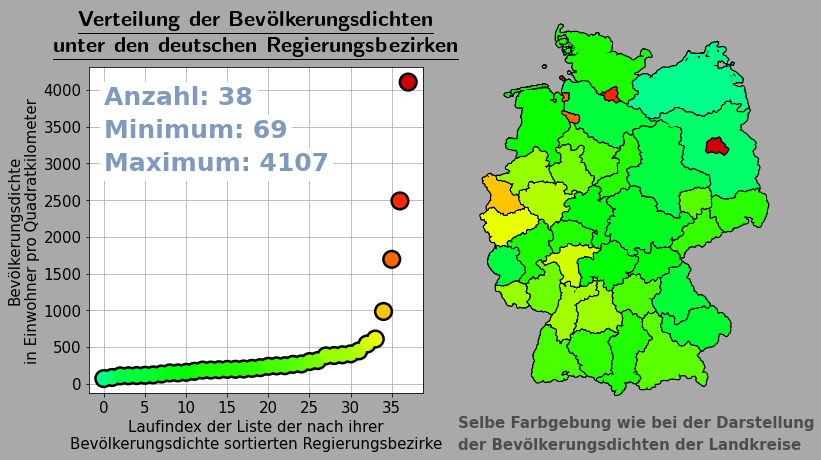

In [4]:
plt.figure(figsize=(6, 6), facecolor='darkgrey')    # enlarge plot
population_densities_districts = [district["population_density"]
                                  for district in districts.values()]
population_densities_districts.sort()

plt.title(r"\textbf{\underline{Verteilung der Bevölkerungsdichten}}"+"\n"+
          r"\textbf{\underline{unter den deutschen Regierungsbezirken}}",
         fontsize=22, y=1.03, usetex=True)
plt.ylabel("Bevölkerungsdichte\nin Einwohner pro Quadratkilometer",
         fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Laufindex der Liste der nach ihrer\n"+
           "Bevölkerungsdichte sortierten Regierungsbezirke", fontsize=15)
plt.xticks(fontsize=15)
plt.text(0, 3800, "Anzahl: " + str(len(population_densities_districts)),
         fontweight=1000, fontsize=25, color=(0.5, 0.6, 0.75),
        backgroundcolor='w')
plt.text(0, 3350, "Minimum: " + str(int(population_densities_districts[0])),
         fontweight=1000, fontsize=25, color=(0.5, 0.6, 0.75),
        backgroundcolor='w')
plt.text(0, 2900, "Maximum: " + str(int(population_densities_districts[-1])),
         fontweight=1000, fontsize=25, color=(0.5, 0.6, 0.75),
        backgroundcolor='w')
plt.text(43, -600, "Selbe Farbgebung wie bei der Darstellung",
         fontweight=1000, fontsize=15, color=(0.3,0.3,0.3))
plt.text(43, -900, "der Bevölkerungsdichten der Landkreise",
         fontweight=1000, fontsize=15, color=(0.3,0.3,0.3))
plt.grid()

colors = list()
for pop_density in population_densities_districts:
    # inhere the population density of the counties (population_densities)
    # is used to scale to compare it easier
    colors.append(color_scheme(math.log(pop_density),
                               [math.log(e) for e in population_densities]))
# plot everything twice: once with black edges - once without
x=[i for i in range(len(population_densities_districts))]
y=population_densities_districts
edges=(["black" for i in range(len(y))]+[(0,0,0,0) for i in range(len(y))])
plt.scatter(x+x,y+y, color=colors+colors, zorder=2, s=200,
            linewidth=5, edgecolors=edges)


ax = plt.axes([1, 0.08, 0.73, 0.94], frameon=False) # [left, bottom, width, height]
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
i=0
for district in districts.values():
    for AdmUnitId in district["counties"]:
        for polygon in counties_geography[AdmUnitId]['raw_geometry']:
            x,y = np.array(polygon).T
            plt.plot(x, y, linewidth=3.5, color="black", zorder=i+2)
        for polygon in counties_geography[AdmUnitId]['geometry']:
            x,y = np.array(polygon).T
            plt.fill(x, y, zorder=i+3, color=color_scheme(
                math.log(district["population_density"]),
                [math.log(e) for e in population_densities]))
    i+=1


os.chdir(".."), os.chdir("..")    # move to correct directory
# check if the needed directory is available - otherwise create it
if not(os.path.isdir("results")): os.makedirs("results")
if not(os.path.isdir("results/Ergebnisse")): os.makedirs("results/Ergebnisse")
plt.savefig("results/Ergebnisse/population_density_ditricts.png",
            facecolor="darkgrey", bbox_inches=Bbox([[-0.95,-0.2],[11,6.3]]))
os.chdir(pop_densities_directory)    # return to original directory